<a href="https://colab.research.google.com/github/Chaithanya3K/smart-food-waste-detection/blob/main/U_Net_Segmentation_mask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install opencv-python if not already installed
!pip install opencv-python-headless -qq

import os
import json
import cv2
import numpy as np

# === Paths ===
image_dir = '/content/drive/MyDrive/FOOD_IMAGE'         # folder with original images
json_dir  = '/content/drive/MyDrive/Mask_annotation'    # folder with VIA JSON files
mask_dir1 = '/content/drive/MyDrive/mask_directory1'     # folder to save generated masks
os.makedirs(mask_dir1, exist_ok=True)

json_files = [f for f in os.listdir(json_dir) if f.endswith('.json')]

for json_file in json_files:
    json_path = os.path.join(json_dir, json_file)
    with open(json_path, 'r') as f:
        data = json.load(f)

    # 🔑 Pick the right dictionary from VIA JSON format
    if "_via_img_metadata" in data:
        data = data["_via_img_metadata"]

    for key, ann in data.items():
        filename = ann.get("filename")
        regions = ann.get("regions", [])

        if not filename or not regions:
            continue

        image_path = os.path.join(image_dir, filename)
        if not os.path.exists(image_path):
            print(f"⚠️ Image not found, skipping: {filename}")
            continue

        img = cv2.imread(image_path)
        height, width = img.shape[:2]

        # Create blank mask
        mask = np.zeros((height, width), dtype=np.uint8)

        # Draw polygons from regions on the mask
        for region in regions:
            shape_attr = region["shape_attributes"]
            if shape_attr["name"] == "polygon":
                all_x = shape_attr["all_points_x"]
                all_y = shape_attr["all_points_y"]
                points = np.array(list(zip(all_x, all_y)), dtype=np.int32)
                cv2.fillPoly(mask, [points], 255)

        # Save mask with the SAME base name as original image but with .png extension
        mask_filename = os.path.splitext(filename)[0] + ".png"
        mask_path = os.path.join(mask_dir1, mask_filename)
        cv2.imwrite(mask_path, mask)
        print(f"✅ Saved mask: {mask_filename}")

✅ Saved mask: image_1.png
✅ Saved mask: image_2.png
✅ Saved mask: image_3.png
✅ Saved mask: image_4.png
✅ Saved mask: image_5.png
✅ Saved mask: image_7.png
✅ Saved mask: image_8.png
✅ Saved mask: image_9.png
✅ Saved mask: image_10.png
✅ Saved mask: image_11.png
✅ Saved mask: image_13.png
✅ Saved mask: image_15.png
✅ Saved mask: image_16.png
✅ Saved mask: image_17.png
✅ Saved mask: image_18.png
✅ Saved mask: image_19.png
✅ Saved mask: image_21.png
✅ Saved mask: image_22.png
✅ Saved mask: image_23.png
✅ Saved mask: image_24.png
✅ Saved mask: image_25.png
✅ Saved mask: image_27.png
✅ Saved mask: image_28.png
✅ Saved mask: image_29.png
✅ Saved mask: image_30.png
✅ Saved mask: image_31.png
✅ Saved mask: image_32.png
✅ Saved mask: image_33.png
✅ Saved mask: image_34.png
✅ Saved mask: image_35.png
✅ Saved mask: image_36.png
✅ Saved mask: image_38.png
✅ Saved mask: image_39.png
✅ Saved mask: image_40 - Copy.png
✅ Saved mask: image_41 - Copy.png
✅ Saved mask: image_42 - Copy.png
✅ Saved mask: i

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split

# === Paths ===
image_dir = '/content/drive/MyDrive/FOOD_IMAGE'    # folder with original images (jpg/png)
mask_dir  = '/content/drive/MyDrive/mask_directory1' # folder with masks (png)
IMG_SIZE = 256

# --- Load all images + masks ---
images, masks = [], []
for file in os.listdir(image_dir):
    if file.endswith(".jpg") or file.endswith(".png"):
        img_path = os.path.join(image_dir, file)

        # Mask filename: same base name but with .png extension
        mask_filename = os.path.splitext(file)[0] + ".png"
        mask_path = os.path.join(mask_dir, mask_filename)

        if not os.path.exists(mask_path):
            print(f"⚠️ No mask found for {file}, skipping...")
            continue

        # Load and resize original image
        img = load_img(img_path, target_size=(IMG_SIZE, IMG_SIZE))
        img = img_to_array(img) / 255.0

        # Load and resize mask image (grayscale)
        mask = load_img(mask_path, target_size=(IMG_SIZE, IMG_SIZE), color_mode="grayscale")
        mask = img_to_array(mask) / 255.0
        mask = (mask > 0.5).astype(np.float32)  # Binarize mask

        images.append(img)
        masks.append(mask)

X = np.array(images)
y = np.array(masks)

print("✅ Dataset loaded:", X.shape, y.shape)

# --- Split into train/val ---
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

⚠️ No mask found for image_6.jpg, skipping...
⚠️ No mask found for image_12.jpg, skipping...
⚠️ No mask found for image_14.jpg, skipping...
⚠️ No mask found for Image_20.jpg, skipping...
⚠️ No mask found for image_26.jpg, skipping...
⚠️ No mask found for image40.jpg, skipping...
⚠️ No mask found for image_49.jpg, skipping...
⚠️ No mask found for image_64.jpg, skipping...
⚠️ No mask found for image_65.jpg, skipping...
⚠️ No mask found for image_70.jpg, skipping...
⚠️ No mask found for image_72.jpg, skipping...
⚠️ No mask found for image_76.jpg, skipping...
⚠️ No mask found for image_89.jpg, skipping...
⚠️ No mask found for image_100.jpg, skipping...
⚠️ No mask found for image_101.jpg, skipping...
⚠️ No mask found for image_114.jpg, skipping...
⚠️ No mask found for image_130.jpg, skipping...
⚠️ No mask found for image_151.jpg, skipping...
⚠️ No mask found for image_139.jpg, skipping...
⚠️ No mask found for image_186.jpg, skipping...
⚠️ No mask found for image_155.jpg, skipping...
⚠️ No m

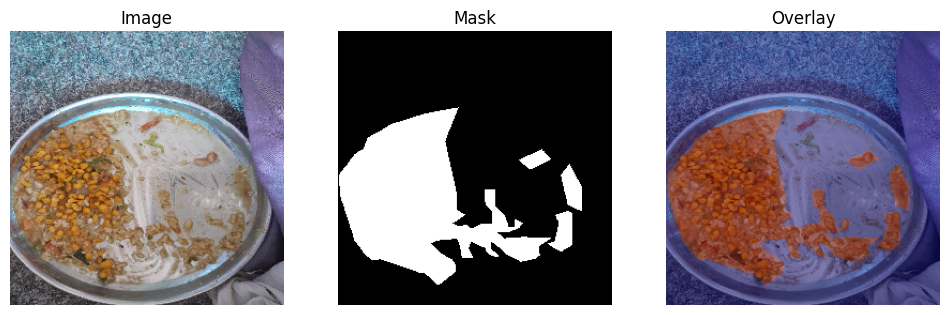

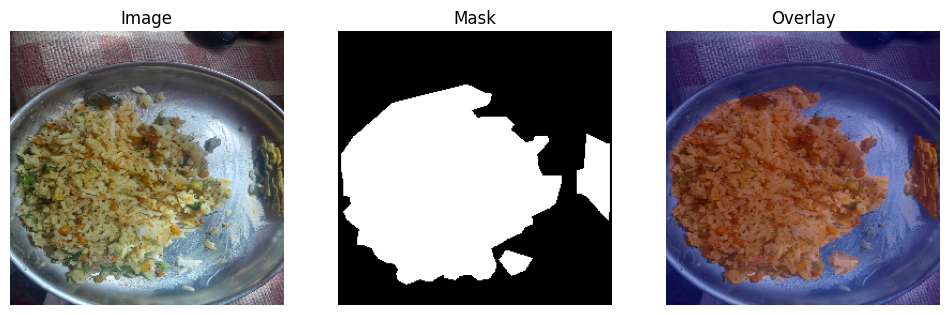

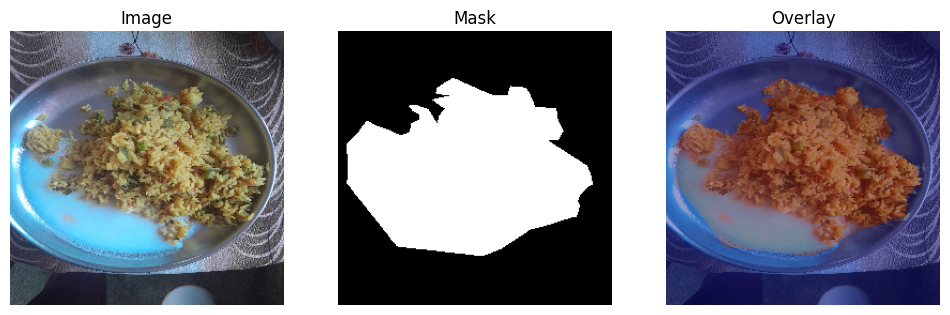

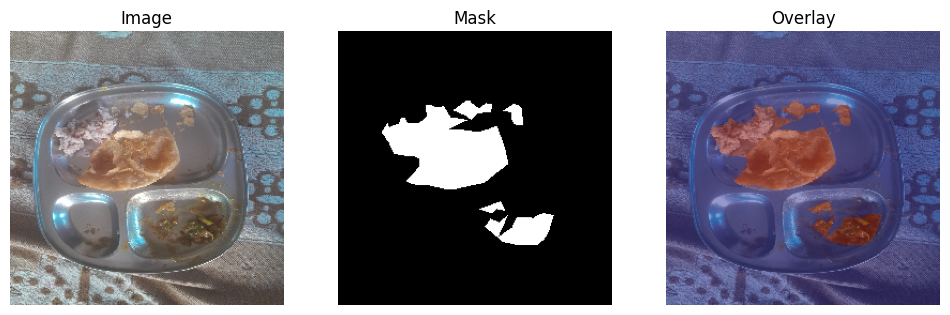

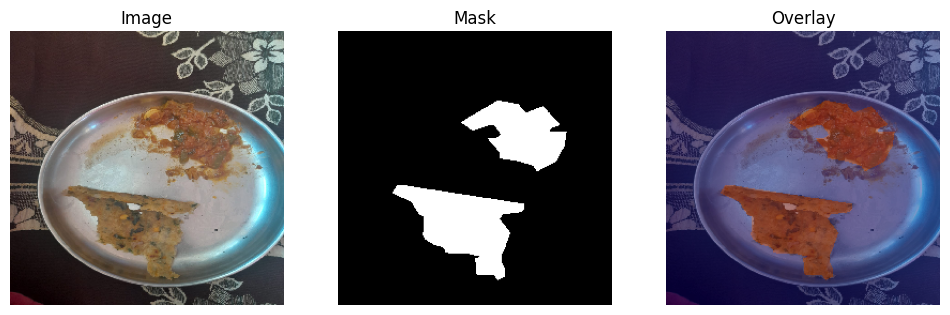

In [ ]:
import matplotlib.pyplot as plt
import random

def visualize_samples(X, y, num_samples=3):
    if len(X) == 0 or len(y) == 0:
        print("⚠️ No data loaded! Check file paths and masks.")
        return

    idxs = random.sample(range(len(X)), min(num_samples, len(X)))

    for i in idxs:
        img = X[i]
        mask = y[i].squeeze()

        plt.figure(figsize=(12,4))

        # Original image
        plt.subplot(1,3,1)
        plt.imshow(img)
        plt.title("Image")
        plt.axis("off")

        # Mask
        plt.subplot(1,3,2)
        plt.imshow(mask, cmap="gray")
        plt.title("Mask")
        plt.axis("off")

        # Overlay
        plt.subplot(1,3,3)
        plt.imshow(img)
        plt.imshow(mask, cmap="jet", alpha=0.4)
        plt.title("Overlay")
        plt.axis("off")

        plt.show()

# 👇 Run immediately after loading your dataset
visualize_samples(X_train, y_train, num_samples=5)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

IMG_SIZE = 256
BATCH_SIZE = 8
EPOCHS = 100

# --- U-Net Architecture ---
def unet_model(input_size=(IMG_SIZE, IMG_SIZE, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, 3, activation="relu", padding="same")(inputs)
    c1 = layers.Conv2D(64, 3, activation="relu", padding="same")(c1)
    p1 = layers.MaxPooling2D(2)(c1)

    c2 = layers.Conv2D(128, 3, activation="relu", padding="same")(p1)
    c2 = layers.Conv2D(128, 3, activation="relu", padding="same")(c2)
    p2 = layers.MaxPooling2D(2)(c2)

    c3 = layers.Conv2D(256, 3, activation="relu", padding="same")(p2)
    c3 = layers.Conv2D(256, 3, activation="relu", padding="same")(c3)
    p3 = layers.MaxPooling2D(2)(c3)

    c4 = layers.Conv2D(512, 3, activation="relu", padding="same")(p3)
    c4 = layers.Conv2D(512, 3, activation="relu", padding="same")(c4)
    p4 = layers.MaxPooling2D(2)(c4)

    # Bottleneck
    c5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(p4)
    c5 = layers.Conv2D(1024, 3, activation="relu", padding="same")(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, 2, strides=2, padding="same")(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, 3, activation="relu", padding="same")(u6)
    c6 = layers.Conv2D(512, 3, activation="relu", padding="same")(c6)

    u7 = layers.Conv2DTranspose(256, 2, strides=2, padding="same")(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, 3, activation="relu", padding="same")(u7)
    c7 = layers.Conv2D(256, 3, activation="relu", padding="same")(c7)

    u8 = layers.Conv2DTranspose(128, 2, strides=2, padding="same")(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, 3, activation="relu", padding="same")(u8)
    c8 = layers.Conv2D(128, 3, activation="relu", padding="same")(c8)

    u9 = layers.Conv2DTranspose(64, 2, strides=2, padding="same")(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, 3, activation="relu", padding="same")(u9)
    c9 = layers.Conv2D(64, 3, activation="relu", padding="same")(c9)

    outputs = layers.Conv2D(1, 1, activation="sigmoid")(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

# --- Build and compile model ---
model = unet_model()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.summary()

# --- Data Augmentation ---
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

def train_generator(X, y, batch_size):
    while True:
        idx = np.random.choice(len(X), batch_size)
        X_batch = X[idx]
        y_batch = y[idx]

        seed = np.random.randint(0, 9999)
        X_iter = datagen.flow(X_batch, batch_size=batch_size, seed=seed, shuffle=False)
        y_iter = datagen.flow(y_batch, batch_size=batch_size, seed=seed, shuffle=False)

        X_aug = next(X_iter)
        y_aug = next(y_iter)

        yield X_aug, y_aug

# --- Training ---
steps_per_epoch = len(X_train) // BATCH_SIZE
val_steps = len(X_val) // BATCH_SIZE

history = model.fit(
    train_generator(X_train, y_train, batch_size=BATCH_SIZE),
    steps_per_epoch=steps_per_epoch,
    validation_data=train_generator(X_val, y_val, batch_size=BATCH_SIZE),
    validation_steps=val_steps,
    epochs=EPOCHS
)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │      1,792 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 64, 64,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 64, 64,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 64, 64,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 32, 32,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │  1,180,160 │ max_pooling2d_2[… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 32, 32,    │  2,359,808 │ conv2d_6[0][0]    │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 16, 16,    │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │  4,719,616 │ max_pooling2d_3[… │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 16, 16,    │  9,438,208 │ conv2d_8[0][0]    │
│                     │ 1024)             │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 32, 32,    │  2,097,664 │ conv2d_9[0][0]    │
│ (Conv2DTranspose)   │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 32, 32,    │          0 │ conv2d_transpose

 Total params: 31,031,745 (118.38 MB)

 Trainable params: 31,031,745 (118.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 83s 874ms/step - accuracy: 0.7644 - loss: 0.5788 - val_accuracy: 0.8315 - val_loss: 0.4196
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 464ms/step - accuracy: 0.8205 - loss: 0.4400 - val_accuracy: 0.8800 - val_loss: 0.2926
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 470ms/step - accuracy: 0.8249 - loss: 0.4167 - val_accuracy: 0.8366 - val_loss: 0.3918
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 474ms/step - accuracy: 0.8045 - loss: 0.4496 - val_accuracy: 0.8726 - val_loss: 0.3148
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 476ms/step - accuracy: 0.8231 - loss: 0.4051 - val_accuracy: 0.8175 - val_loss: 0.4203
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 471ms/step - accuracy: 0.8281 - loss: 0.3935 - val_accuracy: 0.8598 - val_loss: 0.3247
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 15s 471ms/step - accuracy: 0.8149 - loss: 0.4488 - val_accuracy: 0.8366 - val_loss: 0.3712
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 16s 482ms/step - accuracy: 0.7938 - loss: 0.5137 - 

In [ ]:
# === Save the trained model ===
# Change the path to save to Google Drive
model.save("/content/drive/MyDrive/unet_model.h5")
print("✅ Model saved successfully to Google Drive as unet_model.h5")

✅ Model saved successfully to Google Drive as unet_model.h5


In [ ]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load trained model
model = load_model("/content/drive/MyDrive/unet_model.h5")
print("✅ Model loaded!")

✅ Model loaded!


In [ ]:
# Path to a single image (replace this with your image file)
image_path = "/content/drive/MyDrive/FOOD_IMAGE/image100.jpg"  # 🔁 CHANGE this
IMG_SIZE = 256  # same as used in training


In [ ]:
def predict_single_image(model, image_path, img_size):
    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (img_size, img_size))
    input_img = np.expand_dims(img_resized / 255.0, axis=0)

    # Predict the mask
    pred_mask = model.predict(input_img)[0]

    # Convert to binary mask
    pred_mask = (pred_mask > 0.5).astype(np.uint8) * 255

    return img_resized, pred_mask.squeeze()


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step


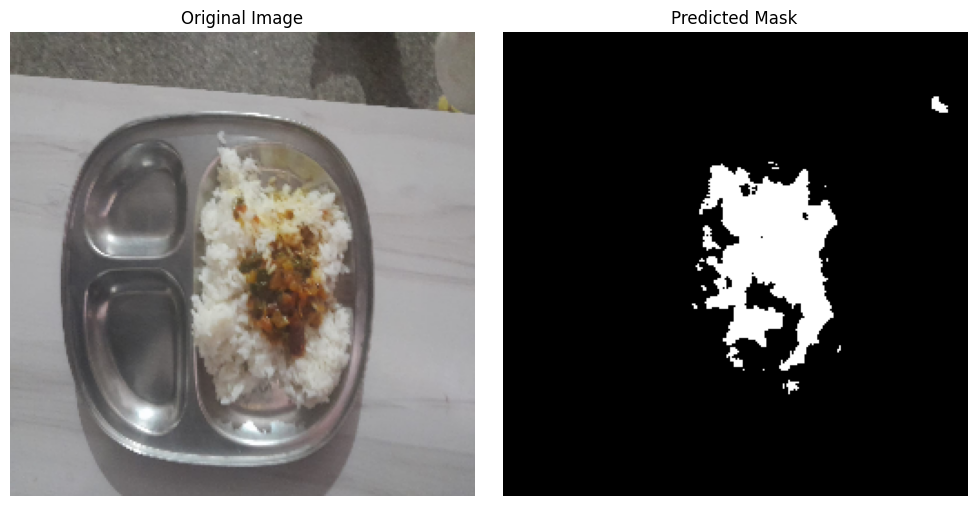

In [ ]:
original, predicted_mask = predict_single_image(model, image_path, IMG_SIZE)

# Display original image and predicted mask
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(original)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Predicted Mask")
plt.imshow(predicted_mask, cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show()
